In [ ]:
from google.colab import files
uploaded = files.upload() #importing data from my local hard drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
myData = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [ ]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

# 1. Data Collection and Data Preparation

## Information about the data

In [ ]:
myData.info() #information about imported the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 7043 rows and 21 columns with 1 float64 data, 2 int64 data, and 18 object data

In [ ]:
myData.head() #display the first 5 rows of of data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data preprocessing as in the example

In [ ]:
myData = myData.loc[~myData['TotalCharges'].str.contains(' ')]
myData['TotalCharges'] = myData['TotalCharges'].astype(float)

In [ ]:
myData.info() #checking the result

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


As a result of the preprocessing, the data now has 7032 rows and data type in column 'TotalCharges' is changed to float

# 2. Data Cleaning

## Checking for missing or NULL data

In [ ]:
myData.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

It turns out there is no null data

In [ ]:
#to delete null or missing value follow this code
#myData = myData.dropna()

In [ ]:
#there is option for you to deep analyst in missing value such as total number of missing value and percentage version of missing value
#you can follow this code for checking total of missing value and percentage of missing value in each columns
#myData.isna().sum()
#myData.isna().sum() * 100 / len(myData)

In [ ]:
#you can also check how many data data that has missing value in your data frame in percentage
#follow this code
#((myData.shape[0] - myData.dropna().shape[0])/myData.shape[0])*100

In [ ]:
#you can use rule of thumb for missing value (but this could lead to bias or any statistical problem if we are not careful)
#follow this code
# Numeric col --> myData['column_name'].fillna(myData['column_name'].median)
# Categorical col --> myData['column_name'].fillna(myData['column_name'].mode)

## Checking for duplicated data

In [ ]:
myData.duplicated().sum()

0

In [ ]:
#to check our duplicated data follow this code
#myData[myData.duplicated(keep=False)].sort_values('gre_score').head(10)
# drop duplicated rows
#myData = myData.drop_duplicates()

There is no duplicated data

# 3. EDA

## Statistic Summaries

In [ ]:
#creates a new list named categoricals for columns with string data type and a list named numericals for columns with numerical data types
categoricals = ['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

numericals = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In this way we can analyze separately the columns with number and object values

In [ ]:
#statistical summary from numericals list
myData[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#examine each numerical column
for col in numericals:
  print(f"Value counts of {col} column") #printing what column it is
  print(myData[col].value_counts(), '\n') #printing the values and their count result

Value counts of SeniorCitizen column
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Value counts of tenure column
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 

Value counts of MonthlyCharges column
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64 

Value counts of TotalCharges column
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64 



In [ ]:
#statistical summary from categorical list
myData[categoricals].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
#examine for each categorical column
for col in categoricals:
  print(f"Value counts of {col} column") #printing what column it is
  print(myData[col].value_counts(), '\n') #printing the values and their count result

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

## Univariant Analysis


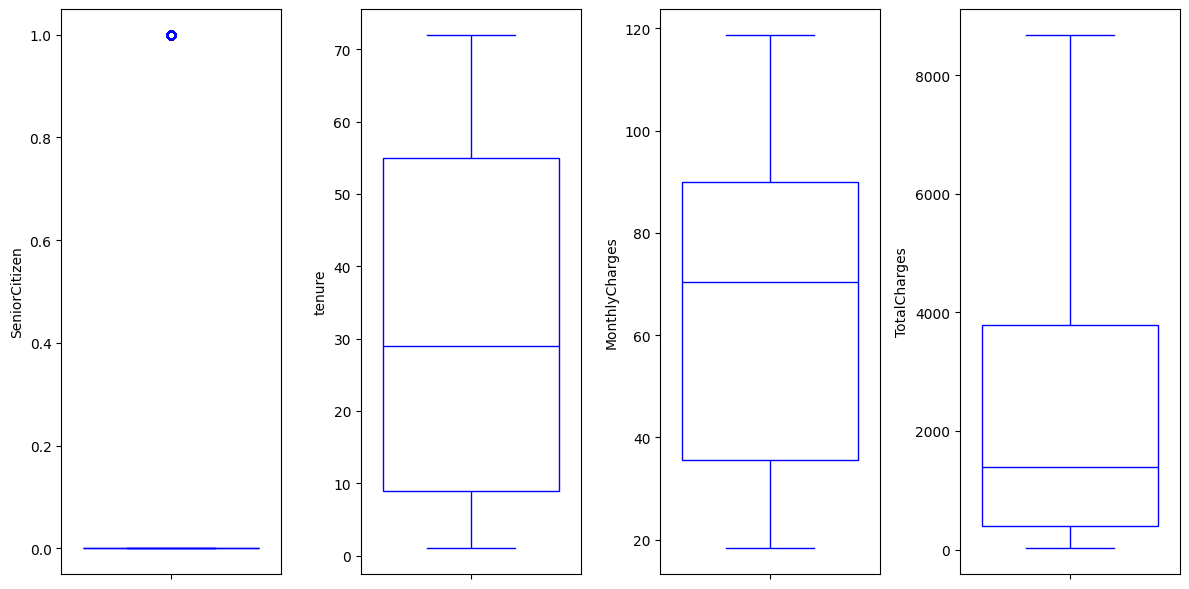

In [ ]:
plt.figure(figsize=(12,6)) #arrange size
for i in range(0, len(numericals)): #looping with range from 0 to lenght of a numericals column
    plt.subplot(1, len(numericals), i+1) #adding new plot as a subplot everytime 1 plot is finish
    sns.boxplot(y=myData[numericals[i]], color='w', fill=True,linecolor='b') #seaborn boxplot command with boxplot setting
    plt.tight_layout() #making sure everthing is fit in the figsize (such as label in each subplot)

Boxplots are used to identify outliers and medians

We can see that the outliers are only in the SeniorCitizen column, but this would not be a problem because the value in SeniorCitizen column is like a boolean data type. This is to determine whether a customer is a senior or not

In [ ]:
#this is how to printing out the outlier
outlier = myData['SeniorCitizen'].max()
myData[myData['SeniorCitizen'] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


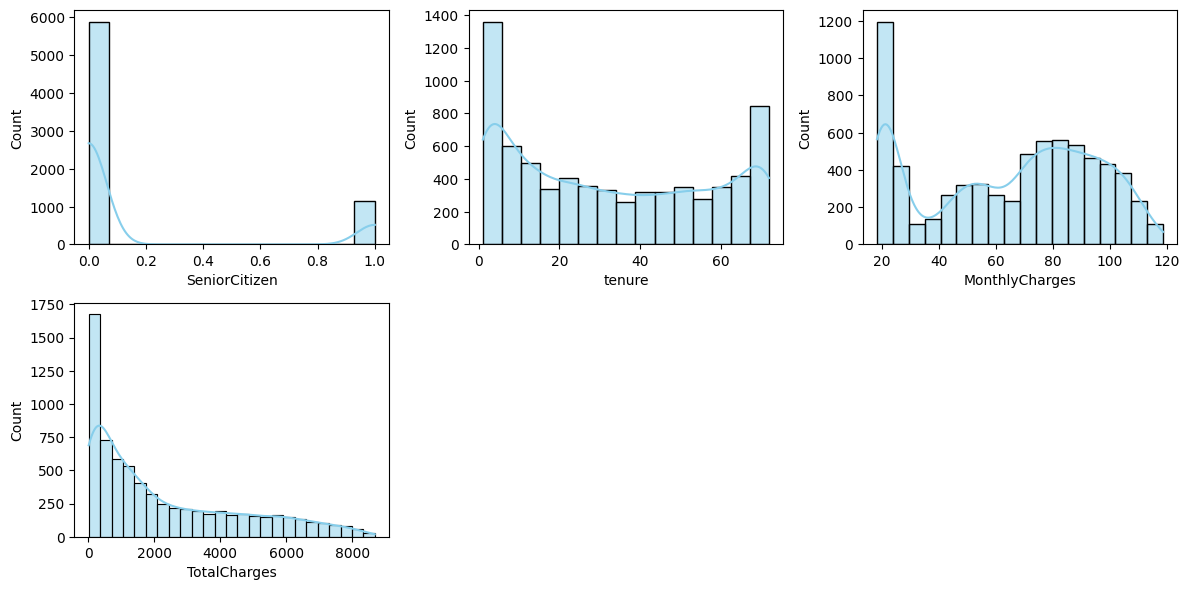

In [ ]:
plt.figure(figsize=(12,6))

for i in range(0, len(numericals)):
    plt.subplot(2, len(numericals)//2 + 1, i+1) #adding new plot as a subplot everytime 1 plot is finish
    sns.histplot(x=myData[numericals[i]], color='skyblue', kde=True) # revised, histogram + kde
    plt.xlabel(numericals[i]) #name each plot as shown in [i]
    plt.tight_layout() #adjusting

## Bivariant and Multivariant Analysis

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

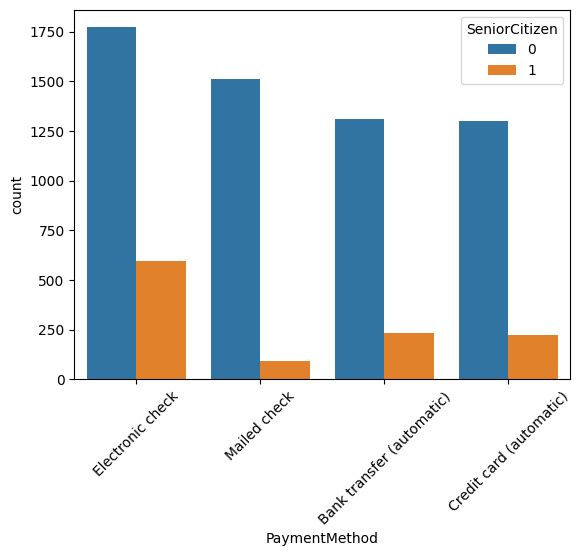

In [ ]:
sns.countplot(data=myData,x='PaymentMethod',hue='SeniorCitizen')
#seaborn countplot with bar chart data as your data, x as x axis, hue as add an additional dimension to a plot by mapping a categorical variable
plt.xticks(rotation=45) #rotating x axis label

<ipython-input-251-71460d9d3cab>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = myData.corr() #setting correlation data


<Axes: >

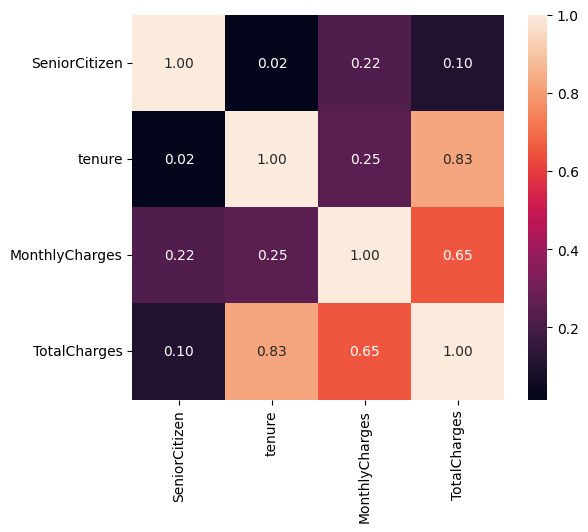

In [ ]:
# correlation heatmap
plt.figure(figsize=(6,5)) #adjusting size
correlation = myData.corr() #setting correlation data
sns.heatmap(correlation, annot=True, fmt='.2f') #seaborn heatmap command and settings

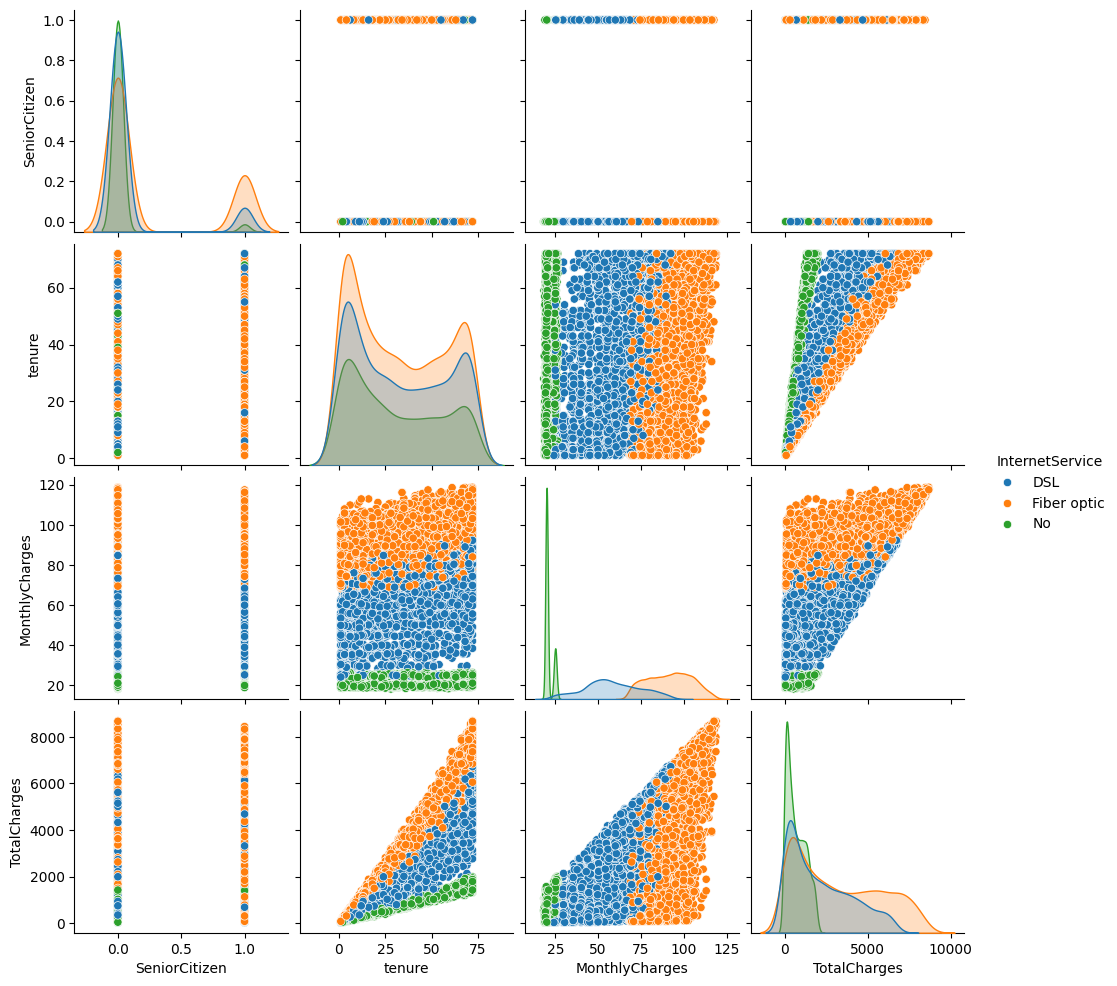

In [ ]:
sns.pairplot(myData, hue='InternetService') #seaborn pairplot command and settings

# EDA Question

## Top 10 Senior customers with fiber optic internet service in total charges


In [ ]:
#create variable for senior citizen is 1 and internet service is fiber optic
senior_fiberoptic = myData[(myData['SeniorCitizen']==1)&(myData['InternetService']=='Fiber optic')]
#create aggregate fuction for top senior
top_senior = (seniors_fiberoptic #using variable that has been created first
            .groupby('customerID') #grouping in customerID
            .agg(sum_total=('TotalCharges','sum')) #aggregate function using sum for totalcharges
            .reset_index() #resetting index
            .sort_values('sum_total',ascending=False) #sorting value as descending
            .head(10) #only showing the first 10 rows
            )
top_senior

,customerID,sum_total
459,5451-YHYPW,8443.70
579,6904-JLBGY,8436.25
111,1480-BKXGA,8404.90
721,8606-CIQUL,8399.15
136,1779-PWPMG,8333.95
423,5135-GRQJV,8331.95
180,2388-LAESQ,8317.95
724,8628-MFKAX,8277.05
581,6919-ELBGL,8196.40
817,9866-OCCKE,8075.35


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '5451-YHYPW'),
  Text(1, 0, '6904-JLBGY'),
  Text(2, 0, '1480-BKXGA'),
  Text(3, 0, '8606-CIQUL'),
  Text(4, 0, '1779-PWPMG'),
  Text(5, 0, '5135-GRQJV'),
  Text(6, 0, '2388-LAESQ'),
  Text(7, 0, '8628-MFKAX'),
  Text(8, 0, '6919-ELBGL'),
  Text(9, 0, '9866-OCCKE')])

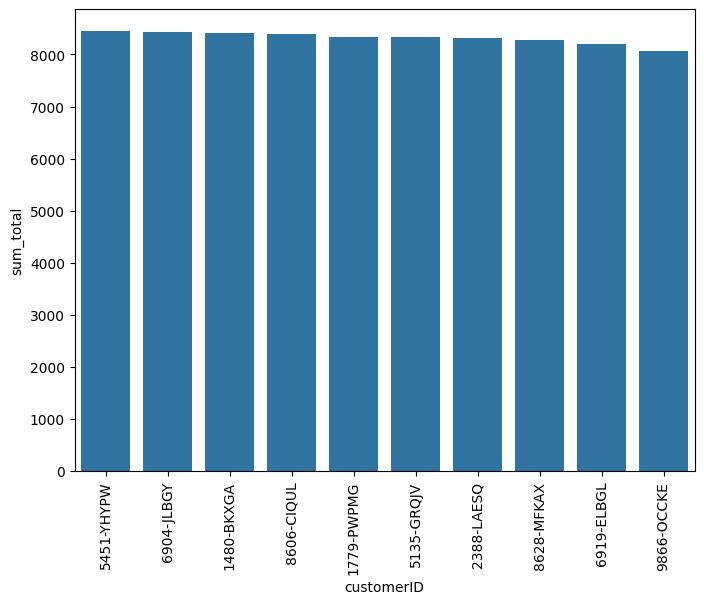

In [ ]:
#visualize with a bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=top_senior, x='customerID', y='sum_total')
plt.xticks(rotation=90)

## How many senior and non-senior customers for each internet service have churn

First, creating variable for churn customer from data set

In [ ]:
churn_customer = myData[myData['Churn'] == 'Yes']
churn_customer['Churn'].value_counts()

Yes    1869
Name: Churn, dtype: int64

Second, creating new variable with aggregate function to count customers group by SeniorCitizen and InternetService

In [ ]:
internetservice_churn = churn_customer.groupby(['SeniorCitizen','InternetService']).agg(
    count_customers = ('customerID','count')
)
internetservice_churn

count_customers
SeniorCitizen InternetService                 
0             DSL                          381
              Fiber optic                  904
              No                           108
1             DSL                           78
              Fiber optic                  393
              No                             5

Visualize it

<Axes: xlabel='InternetService', ylabel='count'>

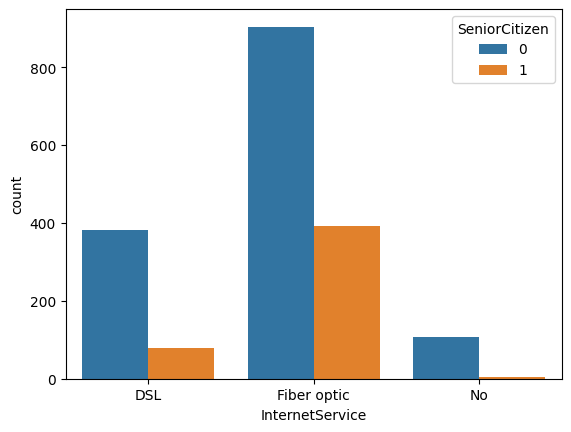

In [ ]:
sns.countplot(data=churn_customer,x='InternetService',hue='SeniorCitizen')

## How many are male and identify as senior customer with tenuer above 30 and have total charges from 7000

Creating variable with logical operators to answer the question

In [ ]:
male_senior_tenure30_total7000 = myData[(myData['SeniorCitizen']==1)&(myData['gender'] == 'Male')&(myData['tenure'] > 30)&(myData['TotalCharges'] >= 7000)]
male_senior_tenure30_total7000['customerID'].count()

39

## From the previous question, show customers who have churned

combining the variable from previous question and add churn columns only 'yes' value

In [ ]:
churnyes = male_senior_tenure30_total7000[male_senior_tenure30_total7000['Churn'] == 'Yes']
churnyes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2287,5440-FLBQG,Male,1,Yes,No,69,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),108.40,7318.20,Yes
2879,4550-VBOFE,Male,1,Yes,No,70,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.95,7101.50,Yes
3439,0917-EZOLA,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.15,7689.95,Yes
5702,5287-QWLKY,Male,1,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,7548.10,Yes
6032,9090-SGQXL,Male,1,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.30,7299.65,Yes
6035,9835-ZIITK,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,110.85,7491.75,Yes
6605,7632-MNYOY,Male,1,No,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),110.90,7432.05,Yes


## Which payment methods do customers prefer and which has high payment overall

group paymentmethod and customerID after that add aggregate of sum for totalcharges

In [ ]:
paymeth_customer = (myData
                .groupby(['PaymentMethod','customerID'])
                .agg(sum_totalpay=('TotalCharges','sum'))
                .reset_index())
paymeth_customer

,PaymentMethod,customerID,sum_totalpay
0,Bank transfer (automatic),0013-SMEOE,7904.25
1,Bank transfer (automatic),0019-EFAEP,7261.25
2,Bank transfer (automatic),0019-GFNTW,2560.10
3,Bank transfer (automatic),0032-PGELS,30.50
4,Bank transfer (automatic),0036-IHMOT,5656.75
...,...,...,...
7027,Mailed check,9979-RGMZT,633.45
7028,Mailed check,9985-MWVIX,70.15
7029,Mailed check,9987-LUTYD,742.90
7030,Mailed check,9992-UJOEL,92.75


using .value_counts() on column 'PaymentMethod' to find which one is the most used by customers

In [ ]:
paymeth_customer['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

visualize with boxplot to conform which has high pay overall

([0, 1, 2, 3],
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

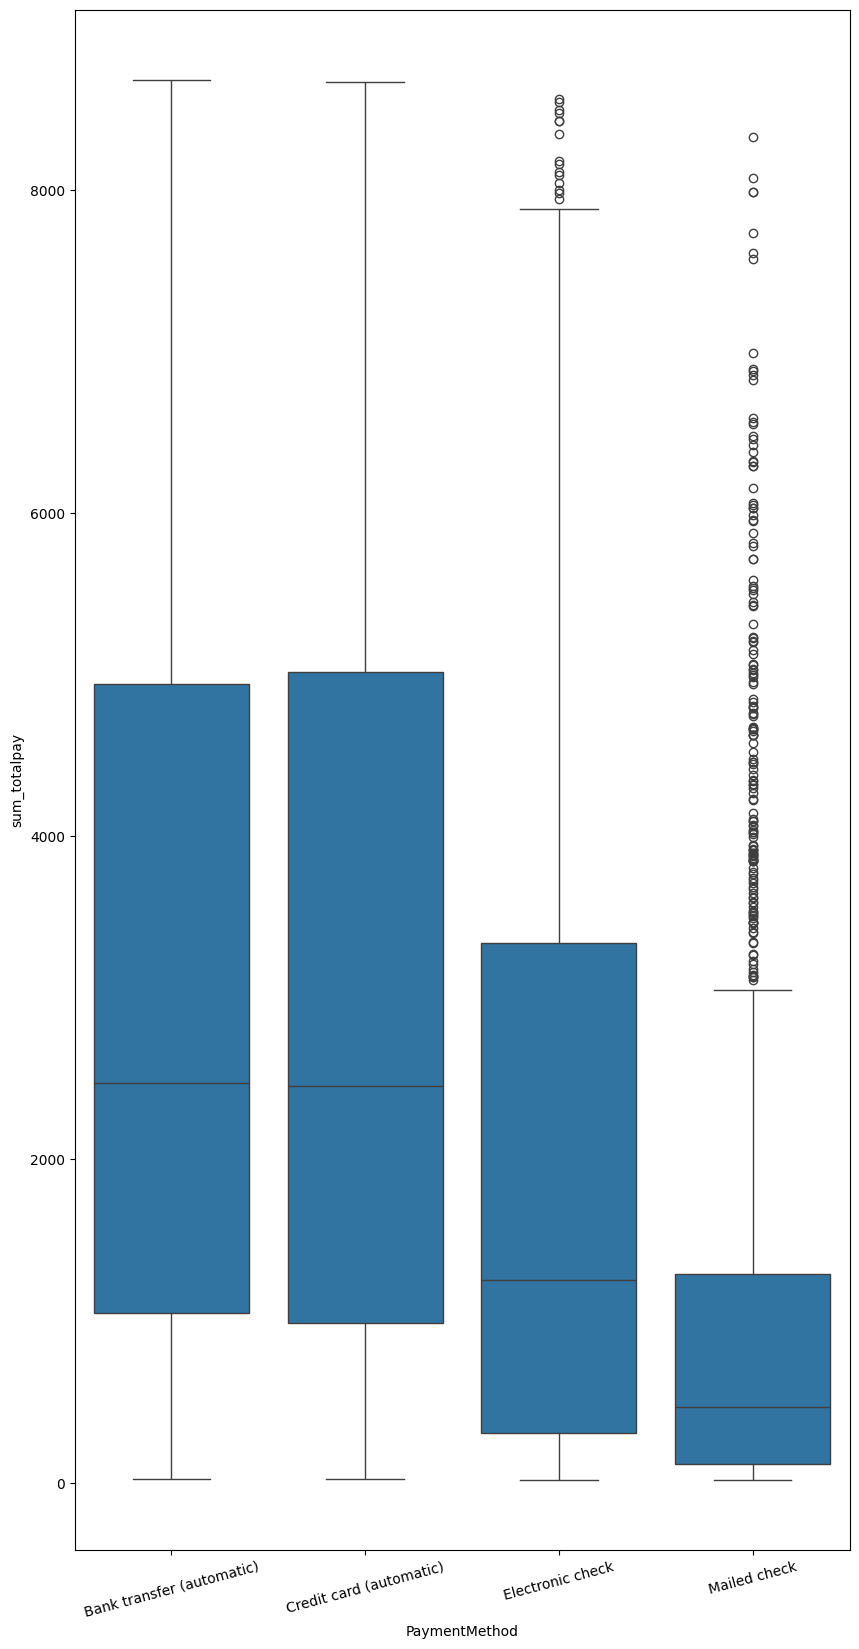

In [ ]:
plt.figure(figsize=(10,20))
sns.boxplot(data=paymeth_customer,
            x='PaymentMethod',
            y='sum_totalpay')
plt.xticks(rotation=15)

From boxplot we can see that credit card has the high payment overall

In [ ]:
paymeth_customer[paymeth_customer['PaymentMethod'] == 'Credit card (automatic)'].agg(sum_credit=('sum_totalpay','sum'))

,sum_totalpay
sum_credit,4671593.35


In [ ]:
paymeth_customer[paymeth_customer['PaymentMethod'] == 'Bank transfer (automatic)'].agg(sum_credit=('sum_totalpay','sum'))

,sum_totalpay
sum_credit,4748279.9
